# 基于单个神经元的手写数字识别（Hangwriting Recongnition Using Single Neron）
## 浙江理工大学 沈炜

## 单个神经元的网络模型

### 生物神经元
<img src='1.jpg' width=400 height=120>
神经元：一端受到刺激会将信号传递到另一端<br>
### 生物神经网络
<img src='2.jpg'>
神经网络：一个神经元将刺激信号传给另一个神经元，神经元与神经元连接构成网络

### 单个神经元（感知机）
<img src="timg.jpg" width=500 height=450 >

计算公式如下：

$${\rm {output}}=f(z)=f(\sum_{i=1}^n w_i \times x_i + b)$$

其中，**$z$**为**输出结果**，**$x_i$**为输入，**$w_i$**为相应的**权重**，**$b$**为**偏置**，$f$为**激活函数**。<br>
单个感知机的计算分成两个部分，<font color=red>线性部分$\sum_{i=1}^n w_i \times x_i + b$</font>，<font color=blue>非线性部分$f()$</font>

### 神经网络模型（多层感知机）
<img src='net.jpg'>
输入层，隐含层，输出层

### 几个重要的概念
** 全连接 **  
- 每一个神经元都和下一层的神经元相连。<br>

** 正向传播 **  
- <font color=red>**由输入计算预测值的过程就是正向传播的过程**</font>。
- 数据是从输入端流向输出端的，**当赋予$w$和$b$合适的值并结合合适的激活函数时**，可产生很好的拟合效果。<br>
为什么这样简单的数学模型的组合能够很好的模拟人的智能，这个目前在数学与生物学上，还没有很好的结论。<br>

** 反向传播 **
- 反向传播的意义在于，告诉我们需要将w和b调整到多少；
- 在刚开始没有得到合适的w和b时，正向传播所产生的结果与真实值之间存在误差；
- **反向传播就是利用这个误差信号修正w和b的取值，从而获得一个与真实值更加接近的输出**。
- 在实际训练过程中，往往需要多次调整$w$和$b$，直至模型输出值与真实值小于某个阈值。

### 激活函数
运行时激活神经网络中部分神经元，将激活信息向后传入下一层神经网络。<br>
激活函数的主要作用是，加入非线性因素，以解决线性模型表达能力不足的问题。<br>
<br>
** 常用激活函数 **<br>
- ** Sigmoid **，在Tensorflow中对应函数为：tf.nn.sigmoid(x, name=None)
- ** Tanh **，在Tensorflow中对应函数为：tf.nn.tanh(x, name=None)
- ** Relu **，在Tensorflow中对应函数为：tf.nn.relu(x, name=None)
<img src='activation.jpg'>

### 训练三部曲
- 正向传播
- 反向传播
- 优化
<img src='1112.gif'>

## 载入数据

In [1]:
#%matplotlib notebook
%matplotlib inline
import tensorflow as tf 

c:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depr

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) # one-hot编码
# http://www.cnblogs.com/lianyingteng/p/7755545.html

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


## 构建模型

** 定义$x$和$y$的占位符 **

In [3]:
tf.reset_default_graph() #清除default graph和不断增加的节点

x = tf.placeholder(tf.float32, (None, 784)) # mnist 中每张图片共有28*28=784个像素点
y = tf.placeholder(tf.float32, (None, 10)) # 0-9 一共10个数字=> 10 个类别

** 创建变量 **

在神经网络中，权值$W$的初始值通常设为正态分布的随机数，偏置项$b$的初始值通常也设为正态分布的随机数或常数。在Tensorflow中，通常利用以下函数实现正态分布随机数的生成：

** tf.random_normal **

In [4]:
norm = tf.random_normal((100,)) #生成100个随机数
#参数：
#shape: 输出张量的形状，必选
#mean: 正态分布的均值，默认为0
#stddev: 正态分布的标准差，默认为1.0
#dtype: 输出的类型，默认为tf.float32
#seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样
#name: 操作的名称
print(norm)
with tf.Session() as sess:
    norm_data=norm.eval()    # 求norm的值，这样就变成了一个列表
print(norm_data[:10])                  #打印前10个随机数

Tensor("random_normal:0", shape=(100,), dtype=float32)
[-0.83913755 -1.1060884   0.6519198  -0.35599175 -0.79133904  1.5514859
  0.11304513 -0.63606685 -1.145411    0.5800881 ]


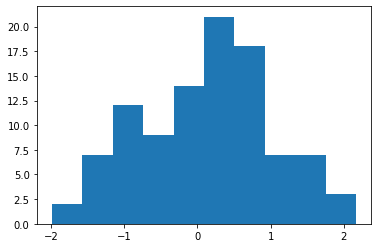

In [5]:
import matplotlib.pyplot as plt
plt.hist(norm_data)  # 分布图
plt.show()  # 基本满足正态分布

在本案例中，以正态分布的随机数初始化权重$W$，以常数0初始化偏置$b$

In [6]:
W = tf.Variable(tf.random_normal((784, 10))) # 为什么是784？为什么有个10？
b = tf.Variable(tf.zeros((10,))) 

<img src='recongnition.jpg'>

** 用单个神经元构建神经网络 **

In [7]:
forward=tf.matmul(x, W) + b # 正向传播，前向输出
tf.summary.histogram('forward',forward)#将前向输出值以直方图显示
# tf.summary.histogram(tags, values, collections=None, name=None)
# name：生成的节点名称.作为TensorBoard中的一个系列名称.
# values：一个实数张量.用于构建直方图的值.
# collections：图形集合键的可选列表.添加新的summary操作到这些集合中.默认为GraphKeys.SUMMARIES.
# family： summary标签名称的前缀,用于在Tensorboard上显示的标签名称.(可选项)

<tf.Tensor 'forward:0' shape=() dtype=string>

示例中在执行训练后在tensorboard界面可查看到如下关于forward的直方图：

<img src="forward_hist_single.jpg" width=400 height=400 />

** 关于Softmax Regression **

当我们处理多分类任务时，通常需要使用Softmax Regression模型。<br>
Softmax Regression会对每一类别估算出一个概率，这些类的概率和为1。<br>
** 工作原理： **将判定为某一类的特征相加，然后将这些特征转化为判定是这一类的概率。<br>
<img src='softmax.jpg' width=320>

In [8]:
# 注意：forward=tf.matmul(x, W) + b 所以forward是一张量
pred = tf.nn.softmax(forward) # Softmax分类
print(pred)

Tensor("Softmax:0", shape=(?, 10), dtype=float32)


## 训练模型

** 设置训练参数 **

In [9]:
train_epochs = 35
batch_size = 100
total_batch= int(mnist.train.num_examples/batch_size)
display_step = 1
learning_rate=0.01

** 定义损失函数 **

In [10]:
loss_function = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1)) # 交叉熵
#loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=tf.log(pred),labels=y))
# https://www.cnblogs.com/kyrieng/p/8694705.html
tf.summary.scalar('loss', loss_function)#将损失以标量显示

<tf.Tensor 'loss:0' shape=() dtype=string>

** 选择优化器 **

In [11]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function) #梯度下降

** 定义准确率 **

In [12]:
# 检查预测类别tf.argmax(pred, 1)与实际类别tf.argmax(y, 1)的匹配情况
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
# 准确率
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # 将布尔值转化为浮点数，并计算平均值

tf.summary.scalar('accuracy', accuracy)#将准确率以标量显示

<tf.Tensor 'accuracy:0' shape=() dtype=string>

In [13]:
sess = tf.Session() #声明会话
init = tf.global_variables_initializer() # 变量初始化
sess.run(init)

In [14]:
log_dir='d:/log'
merged_summary_op = tf.summary.merge_all()#合并所有summary
writer = tf.summary.FileWriter(log_dir, sess.graph) #创建写入符

In [ ]:
# 开始训练
for epoch in range(train_epochs):
    for batch in range(total_batch):
        xs, ys = mnist.train.next_batch(batch_size)# 读取批次数据
        sess.run(optimizer,feed_dict={x: xs,y: ys}) # 执行批次训练
        
        #生成summary
        summary_str = sess.run(merged_summary_op,feed_dict={x: xs,y: ys})
        writer.add_summary(summary_str, epoch)#将summary 写入文件
        #total_batch个批次训练完成后，使用验证数据计算误差与准确率   
    loss,acc = sess.run([loss_function,accuracy],
                        feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
    # 打印训练过程中的详细信息
    if (epoch+1) % display_step == 0:
        print("Train Epoch:", '%02d' % (epoch+1), "Loss=", "{:.9f}".format(loss)," Accuracy=","{:.4f}".format(acc))

print("Train Finished!")  

Train Epoch: 01 Loss= 5.287127972  Accuracy= 0.3078
Train Epoch: 02 Loss= 3.421632767  Accuracy= 0.4638
Train Epoch: 03 Loss= 2.570934296  Accuracy= 0.5606


从上述打印结果可以看出损失值** Loss **是趋于更小的，同时，准确率** Accuracy **越来越高。<br>
此外，我们还可以通过Tensorboard查看loss和accuracy的执行过程。<br>
<br>
通过tensorboard --logdir=log/mnist_single_neuron进入可视化界面，在scalar版面中可以查看loss和accuracy，如下图所示：<br>



<img src="acc_scalar_single.jpg"/> 
<img src="loss_scalar_single.jpg"/>

## 评估模型

** 完成训练后，在测试集上评估模型的准确率 **

In [23]:
print("Test Accuracy:", sess.run(accuracy,
                           feed_dict={x: mnist.test.images, y: mnist.test.labels}))

Test Accuracy: 0.8562


## 进行预测

** 在建立模型并进行训练后，若认为准确率可以接受，则可以使用此模型进行预测。 **

In [24]:
prediction_result=sess.run(tf.argmax(pred,1), # 由于pred预测结果是one-hot编码格式，所以需要转换为0~9数字
                           feed_dict={x: mnist.test.images })

** 查看预测结果 **

In [25]:
prediction_result[0:10] #查看预测结果中的前10项

array([7, 2, 1, 0, 9, 1, 4, 5, 6, 7], dtype=int64)

** 定义可视化函数 **

In [26]:
#%matplotlib notebook  # jupyter notebook的写法
# jupyter lab 写法
%matplotlib inline    
import matplotlib.pyplot as plt
import numpy as np
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(10, 12)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        
        ax.imshow(np.reshape(images[idx],(28, 28)), 
                  cmap='binary')
            
        title= "label=" +str(np.argmax(labels[idx]))
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

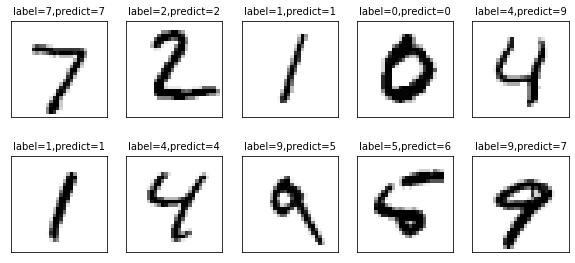

In [27]:
plot_images_labels_prediction(mnist.test.images,
                              mnist.test.labels,
                              prediction_result,0)

从上面结果可知，通过30次迭代所训练的由** 单个神经元 **构成的神经网络模型，在测试集上能够取得百分之八十以上的准确率。接下来，我们将尝试** 加宽 **和** 加深 **模型，看看能否得到更高的准确率。

## 实验题
### 实验题1：变更迭代次数和其他的相关设置，观察识别准确率的变化情况，并自己总结。